# Phase-1 Sample

## Load the Dataset

In [1]:
from google.colab import files
import pandas as pd

# Upload the file and load it into a DataFrame
uploaded = files.upload()
data = pd.read_csv('AB_NYC_2019.csv')

Saving AB_NYC_2019.csv to AB_NYC_2019 (4).csv


## Analyze the Distribution of Key Features

In [2]:
# Display the first few rows
print("First few rows of the dataset:")
display(data.head())

First few rows of the dataset:


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# Basic information about the dataset
print("\nDataset Information:")
data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_revie

In [4]:
data['room_type'].value_counts()

,count
room_type,
Entire home/apt,25409
Private room,22326
Shared room,1160


## Stratified Sampling

In [5]:
from sklearn.model_selection import train_test_split

# Stratified sampling based on 'room_type'
sample_data, _ = train_test_split(data, test_size=0.8, stratify=data['room_type'], random_state=42)
sample_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
18957,15054630,"Clean, large, private R room with queen sized bed",42561290,Carla,Brooklyn,East New York,40.66136,-73.86780,Private room,45,2,38,2019-02-11,1.24,4,159
27005,21380282,"Spacious private bedroom in Park Slope, Brooklyn.",2245915,Jonathan,Brooklyn,Gowanus,40.68120,-73.98186,Private room,85,3,2,2018-09-29,0.15,1,0
45469,34776151,Bedroom + den + bath w/ sep. entry in Bed Stuy!,73612539,Rebecca,Brooklyn,Bedford-Stuyvesant,40.68602,-73.94844,Private room,68,1,8,2019-07-02,6.32,2,36
36928,29356679,Private Room that’s comfortable and convenient,134170699,Rafa' S,Queens,Elmhurst,40.73756,-73.87787,Private room,65,2,2,2019-06-30,1.43,2,364
22844,18500556,Fully renovated beautifully furnished two bedroom,128385204,Ronen,Brooklyn,Sheepshead Bay,40.59339,-73.94296,Private room,199,1,0,NaN,NaN,1,0


# Phase-2 Explore

## Visualize Correlations

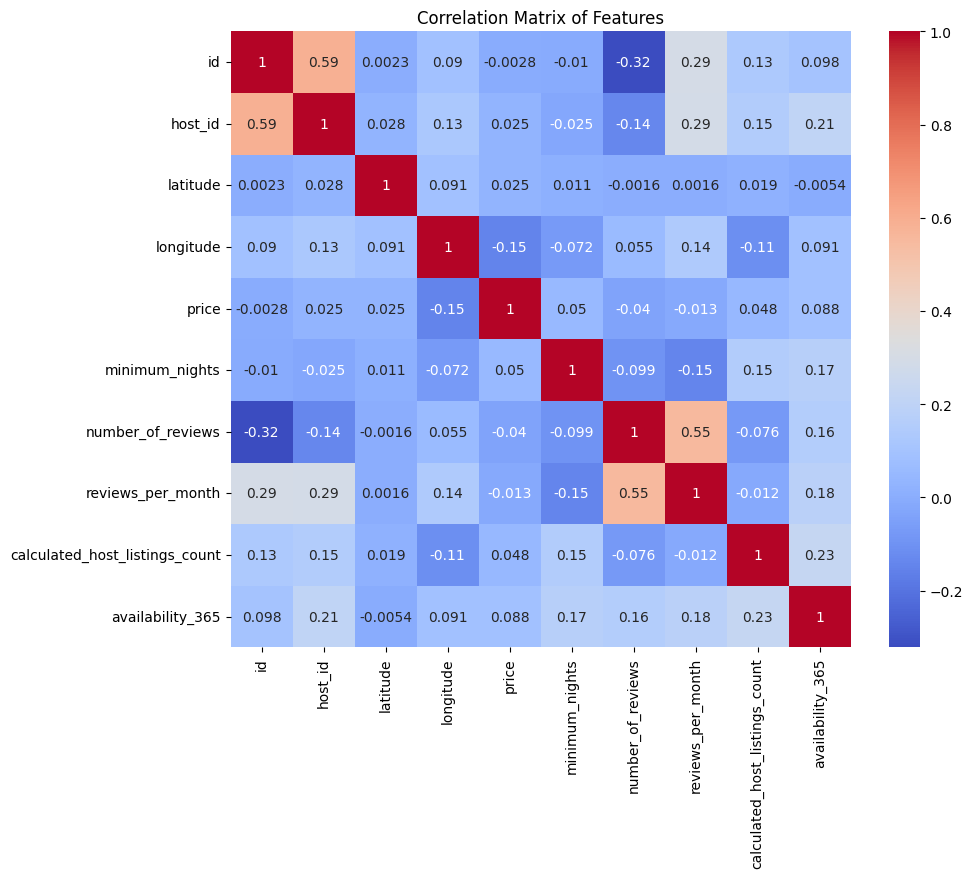

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 8))

numeric_data = sample_data.select_dtypes(include=['number'])

sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Features")
plt.show()


In [7]:
# Summary statistics for numerical columns
print("\nSummary Statistics:")
display(data.describe())


Summary Statistics:


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Examine Distributions

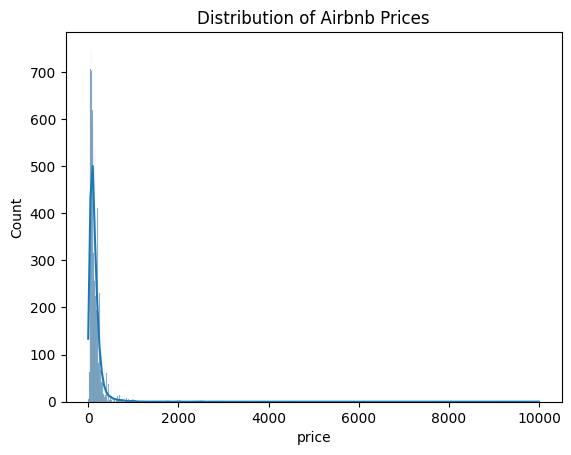

In [8]:
sns.histplot(sample_data['price'], kde=True)
plt.title("Distribution of Airbnb Prices")
plt.show()



Top 10 Neighbourhoods by Average Price:
neighbourhood
Fort Wadsworth       800.000000
Woodrow              700.000000
Tribeca              490.638418
Sea Gate             487.857143
Riverdale            442.090909
Prince's Bay         409.500000
Battery Park City    367.557143
Flatiron District    341.925000
Randall Manor        336.000000
NoHo                 295.717949
Name: price, dtype: float64


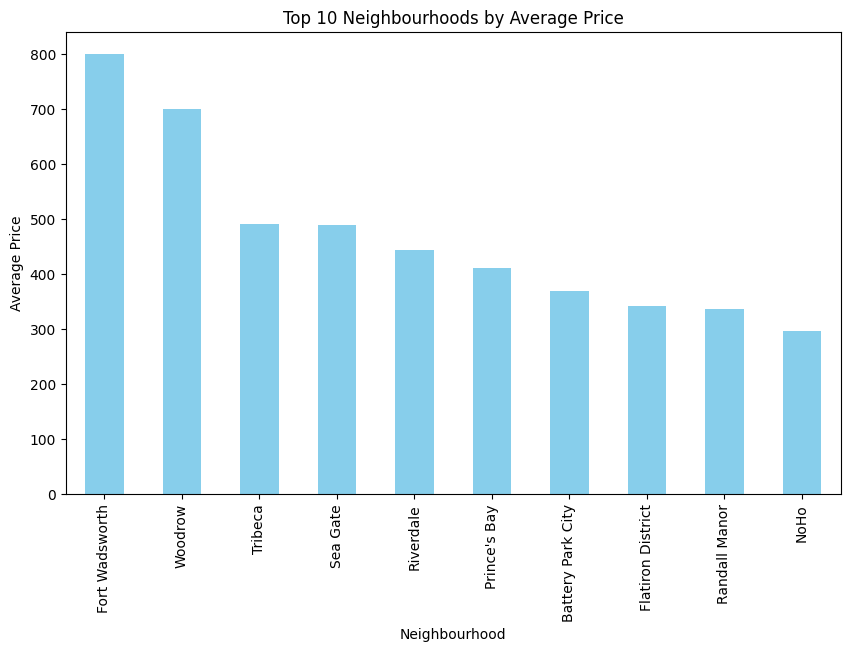

In [9]:
# Exploring average price by neighbourhood
avg_price_neighbourhood = data.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Neighbourhoods by Average Price:")
print(avg_price_neighbourhood)

plt.figure(figsize=(10, 6))
avg_price_neighbourhood.plot(kind='bar', color='skyblue')
plt.title("Top 10 Neighbourhoods by Average Price")
plt.xlabel("Neighbourhood")
plt.ylabel("Average Price")
plt.show()

### Log Transformation

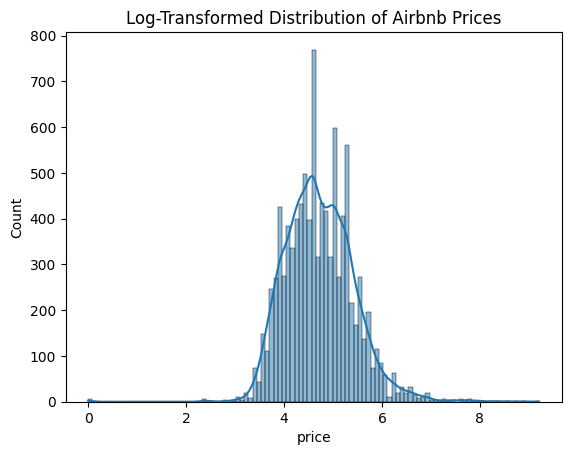

In [10]:
import numpy as np

sns.histplot(np.log1p(sample_data['price']), kde=True)
plt.title("Log-Transformed Distribution of Airbnb Prices")
plt.show()


### Multiple Features


Availability Analysis:


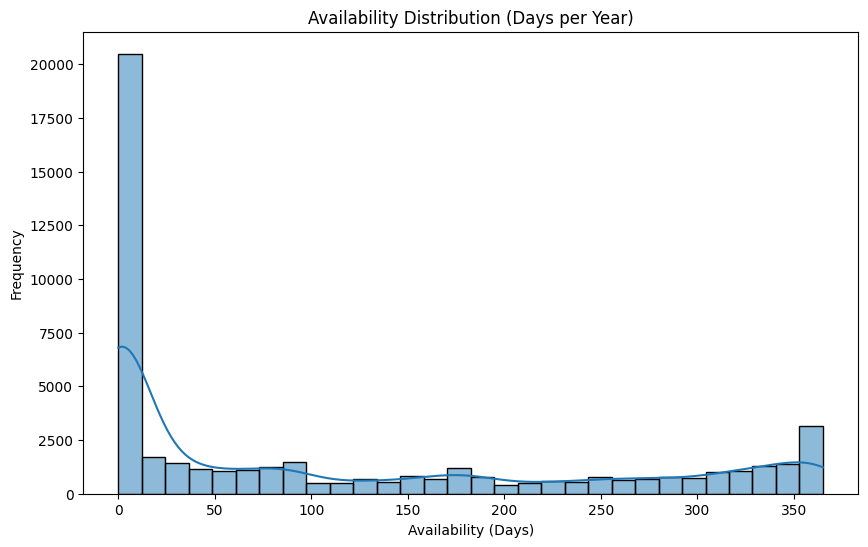

In [11]:
# Availability analysis
print("\nAvailability Analysis:")
plt.figure(figsize=(10, 6))
sns.histplot(data['availability_365'], bins=30, kde=True)
plt.title("Availability Distribution (Days per Year)")
plt.xlabel("Availability (Days)")
plt.ylabel("Frequency")
plt.show()


Reviews Analysis:


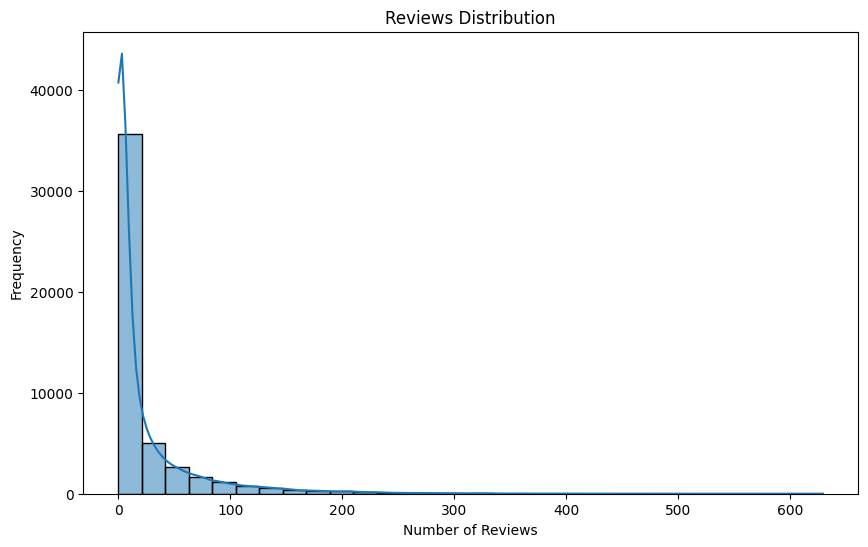

In [12]:
# Reviews analysis
print("\nReviews Analysis:")
plt.figure(figsize=(10, 6))
sns.histplot(data['number_of_reviews'], bins=30, kde=True)
plt.title("Reviews Distribution")
plt.xlabel("Number of Reviews")
plt.ylabel("Frequency")
plt.show()


Minimum Nights Analysis:


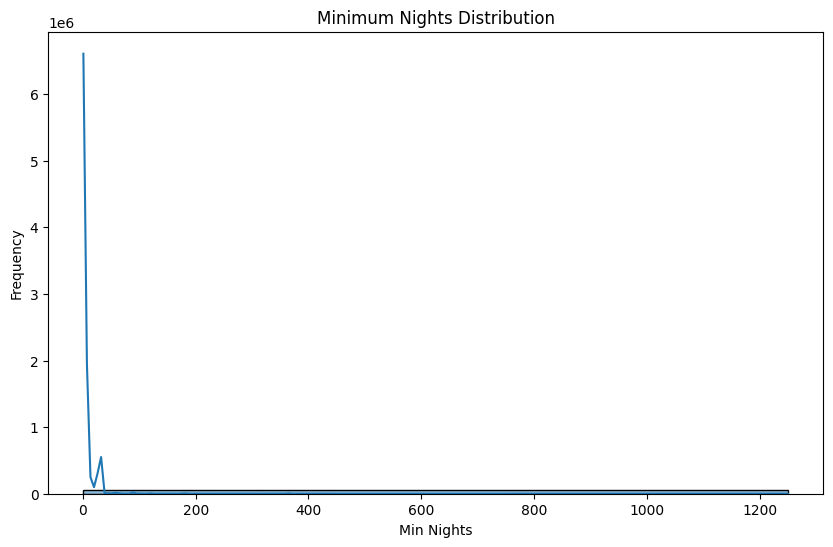

In [13]:
# Minimum Nights analysis
print("\nMinimum Nights Analysis:")
plt.figure(figsize=(10, 6))
sns.histplot(data['minimum_nights'], bins=1, kde=True)
plt.title("Minimum Nights Distribution")
plt.xlabel("Min Nights")
plt.ylabel("Frequency")
plt.show()

## Outlier Detection

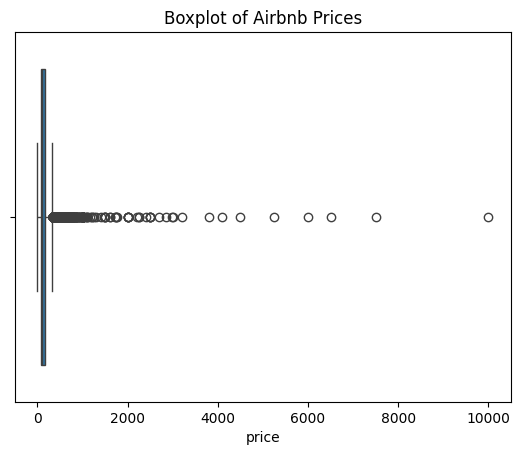

In [14]:
sns.boxplot(x=sample_data['price'])
plt.title("Boxplot of Airbnb Prices")
plt.show()


### Multiple Boxplots

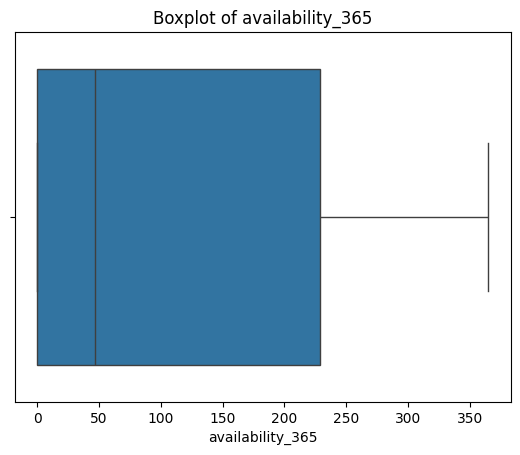

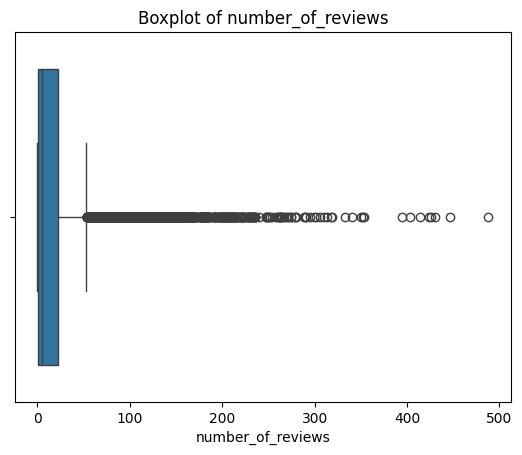

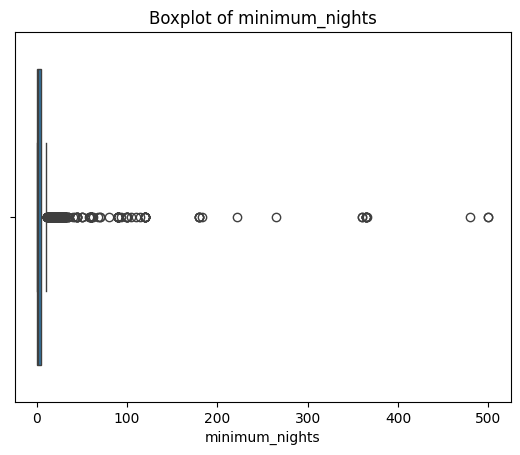

In [15]:
for col in ['availability_365', 'number_of_reviews', 'minimum_nights']:
    sns.boxplot(x=sample_data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


### Grouping by Categories

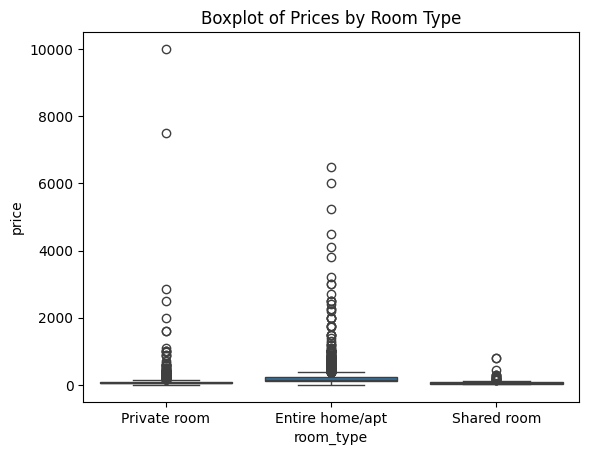

In [16]:
sns.boxplot(x='room_type', y='price', data=sample_data)
plt.title("Boxplot of Prices by Room Type")
plt.show()



Boxplot of Price by Neighbourhood Group and Room Type:


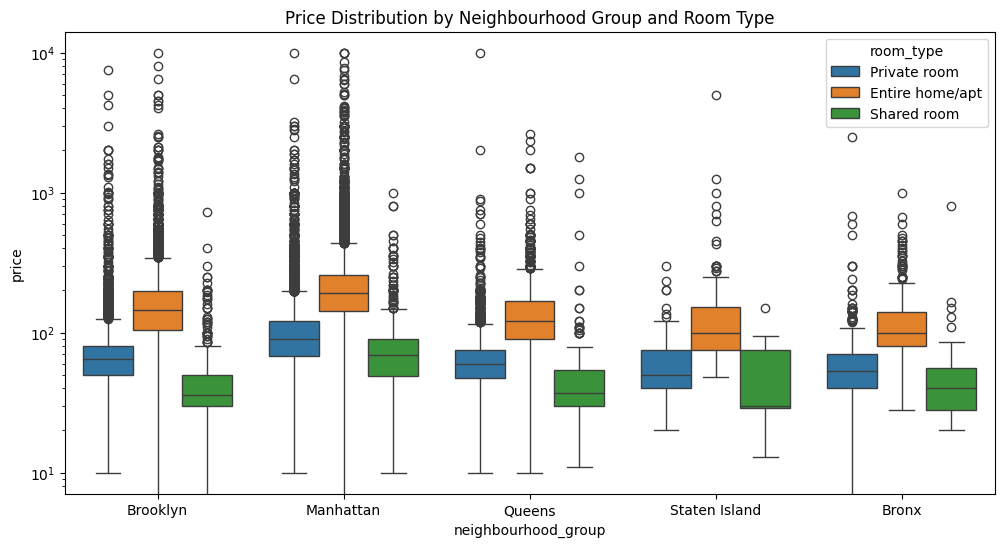

In [17]:
# Distribution of prices by neighbourhood group and room type
print("\nBoxplot of Price by Neighbourhood Group and Room Type:")
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_group', y='price', hue='room_type', data=data)
plt.yscale('log')  # Use logarithmic scale for better visualization
plt.title("Price Distribution by Neighbourhood Group and Room Type")
plt.show()


Pairplot of Selected Features:


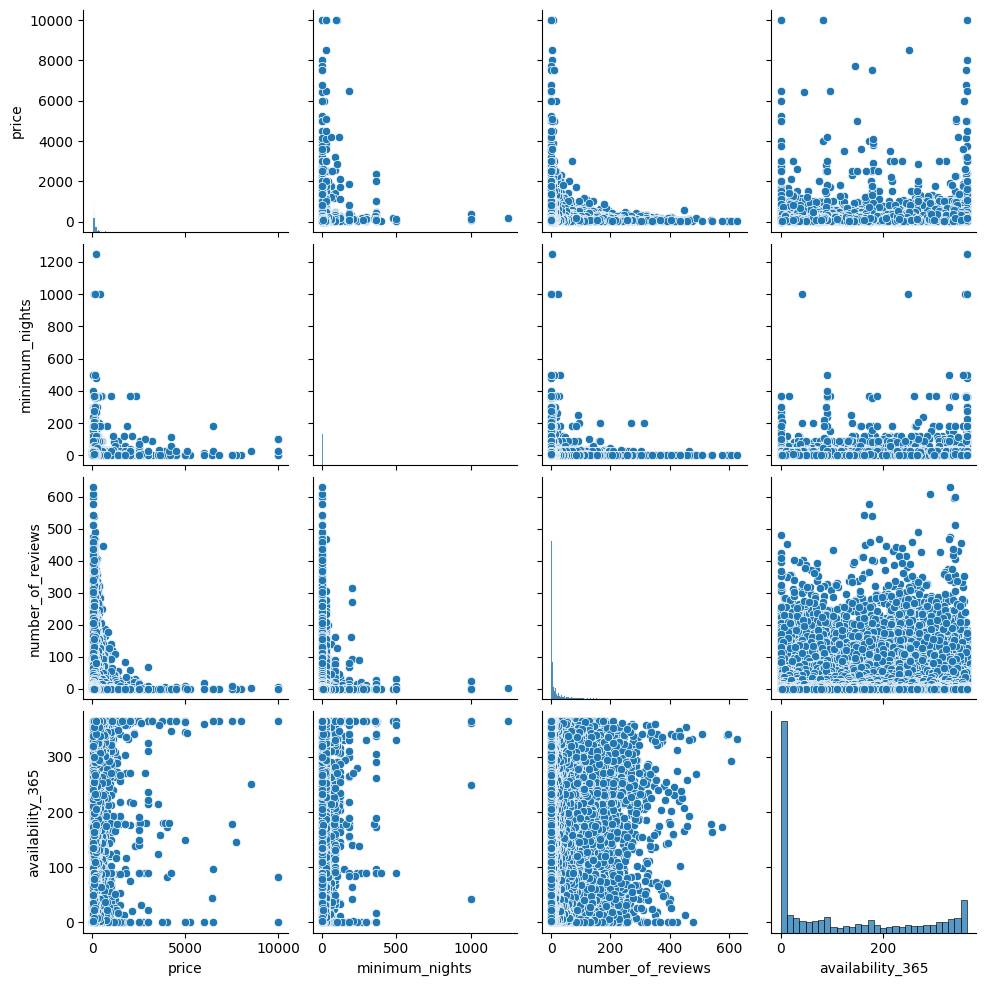

In [18]:
# Pairplot for selected features
print("\nPairplot of Selected Features:")
sns.pairplot(data[['price', 'minimum_nights', 'number_of_reviews', 'availability_365']])
plt.show()


Scatter Plots for Feature Relationships:


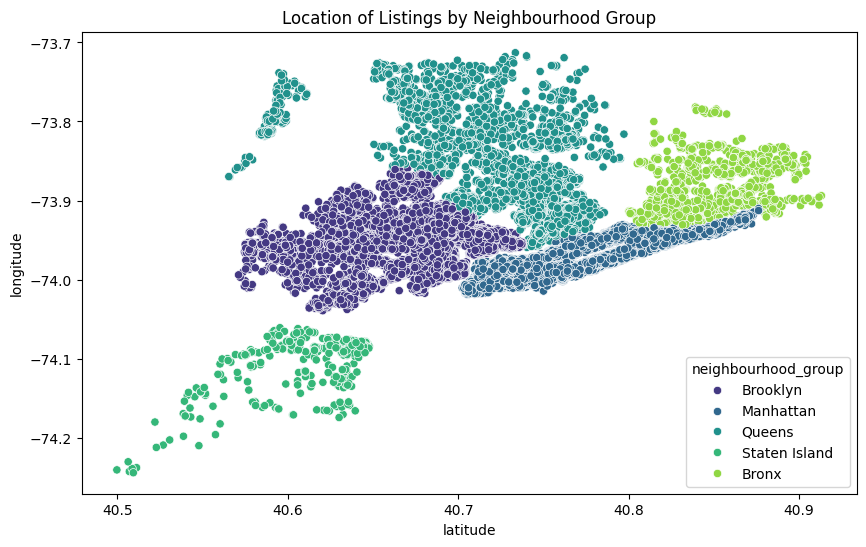

In [19]:
# Scatter plots to explore relationships
print("\nScatter Plots for Feature Relationships:")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='latitude', y='longitude', hue='neighbourhood_group', data=data, palette='viridis')
plt.title("Location of Listings by Neighbourhood Group")
plt.show()


Analysis of Minimum Nights Required:


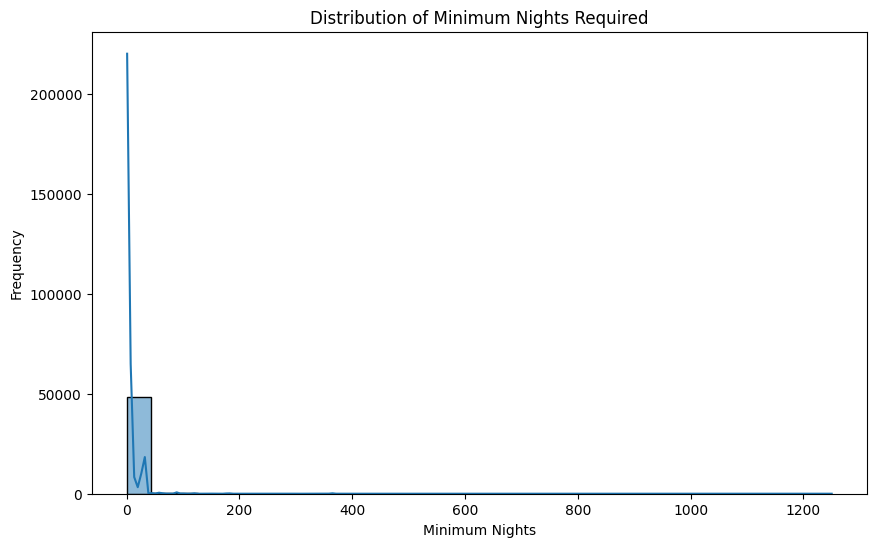

In [20]:
# Insights on minimum_nights required for booking
print("\nAnalysis of Minimum Nights Required:")
plt.figure(figsize=(10, 6))
sns.histplot(data['minimum_nights'], bins=30, kde=True)
plt.title("Distribution of Minimum Nights Required")
plt.xlabel("Minimum Nights")
plt.ylabel("Frequency")
plt.show()

## Missing Value Analysis

In [21]:
# Checking for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])


Missing Values:
name                    16
host_name               21
last_review          10052
reviews_per_month    10052
dtype: int64


## Categorical Feature Analysis

In [22]:
# Checking for unique values in categorical columns
categorical_cols = ['neighbourhood_group', 'neighbourhood', 'room_type']
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(data[col].unique())


Unique values in neighbourhood_group:
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']

Unique values in neighbourhood:
['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbush'
 'Tompkinsville' 'Astoria' 'Clason Point' 'East


Countplots for Categorical Features:


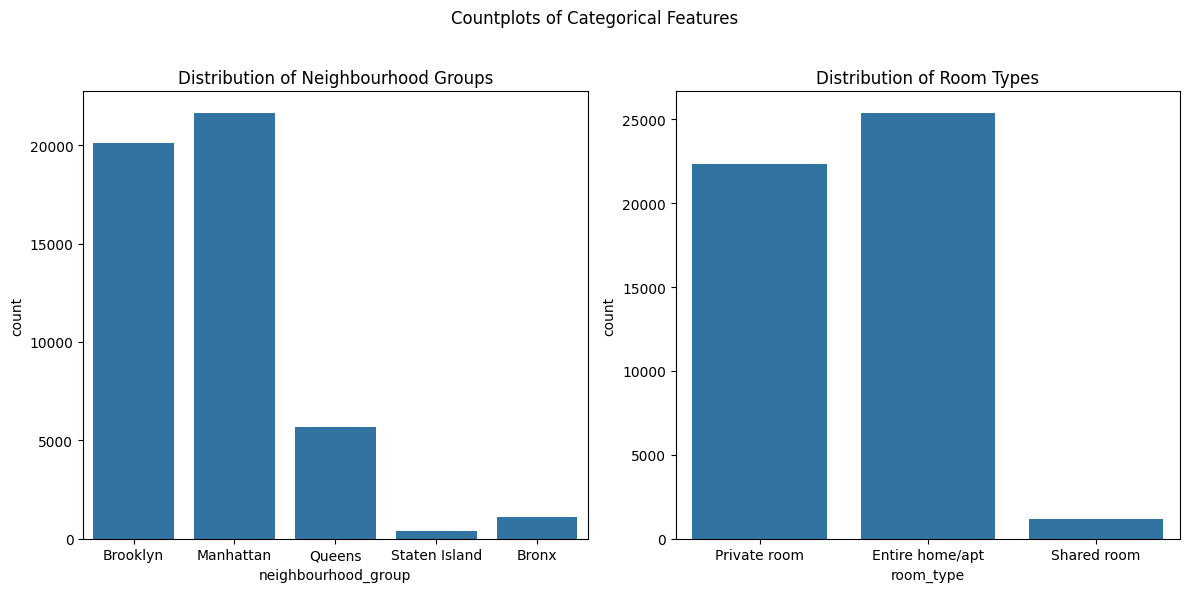

In [23]:
# Countplots for categorical features
print("\nCountplots for Categorical Features:")
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Countplots of Categorical Features")

sns.countplot(x='neighbourhood_group', data=data, ax=axes[0])
axes[0].set_title("Distribution of Neighbourhood Groups")

sns.countplot(x='room_type', data=data, ax=axes[1])
axes[1].set_title("Distribution of Room Types")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Feature Interaction Plots

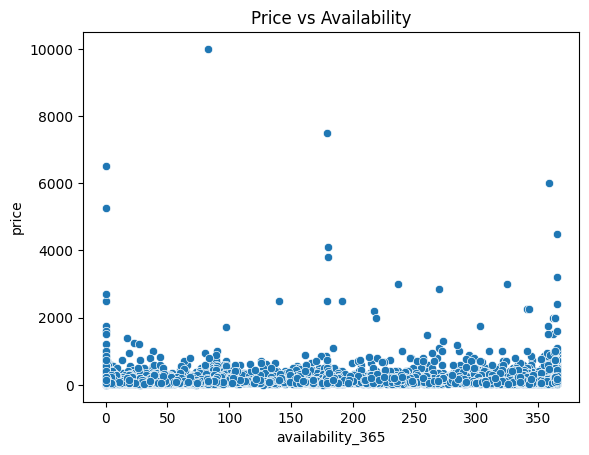

In [24]:
sns.scatterplot(x='availability_365', y='price', data=sample_data)
plt.title("Price vs Availability")
plt.show()


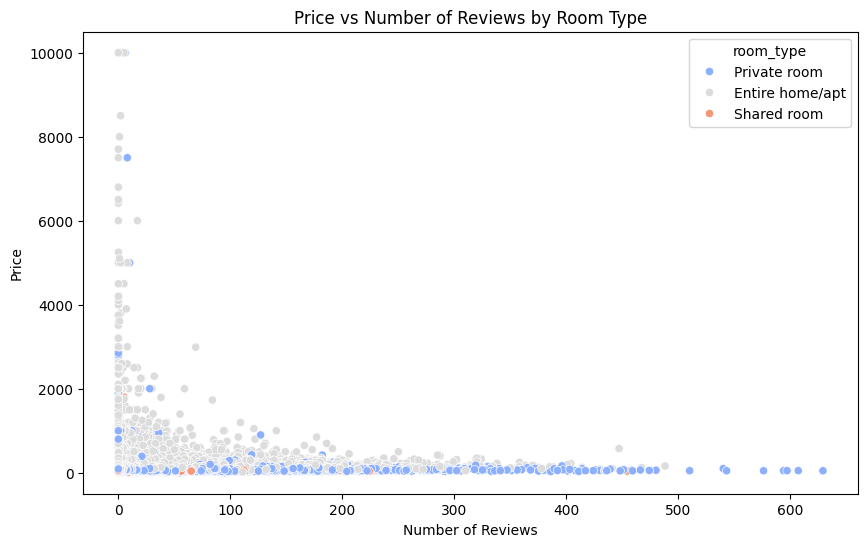

In [25]:
# Scatter plot of price vs. number_of_reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_of_reviews', y='price', hue='room_type', data=data, palette='coolwarm')
plt.title("Price vs Number of Reviews by Room Type")
plt.xlabel("Number of Reviews")
plt.ylabel("Price")
plt.show()

## Numerical Features


Distribution of Numerical Features:


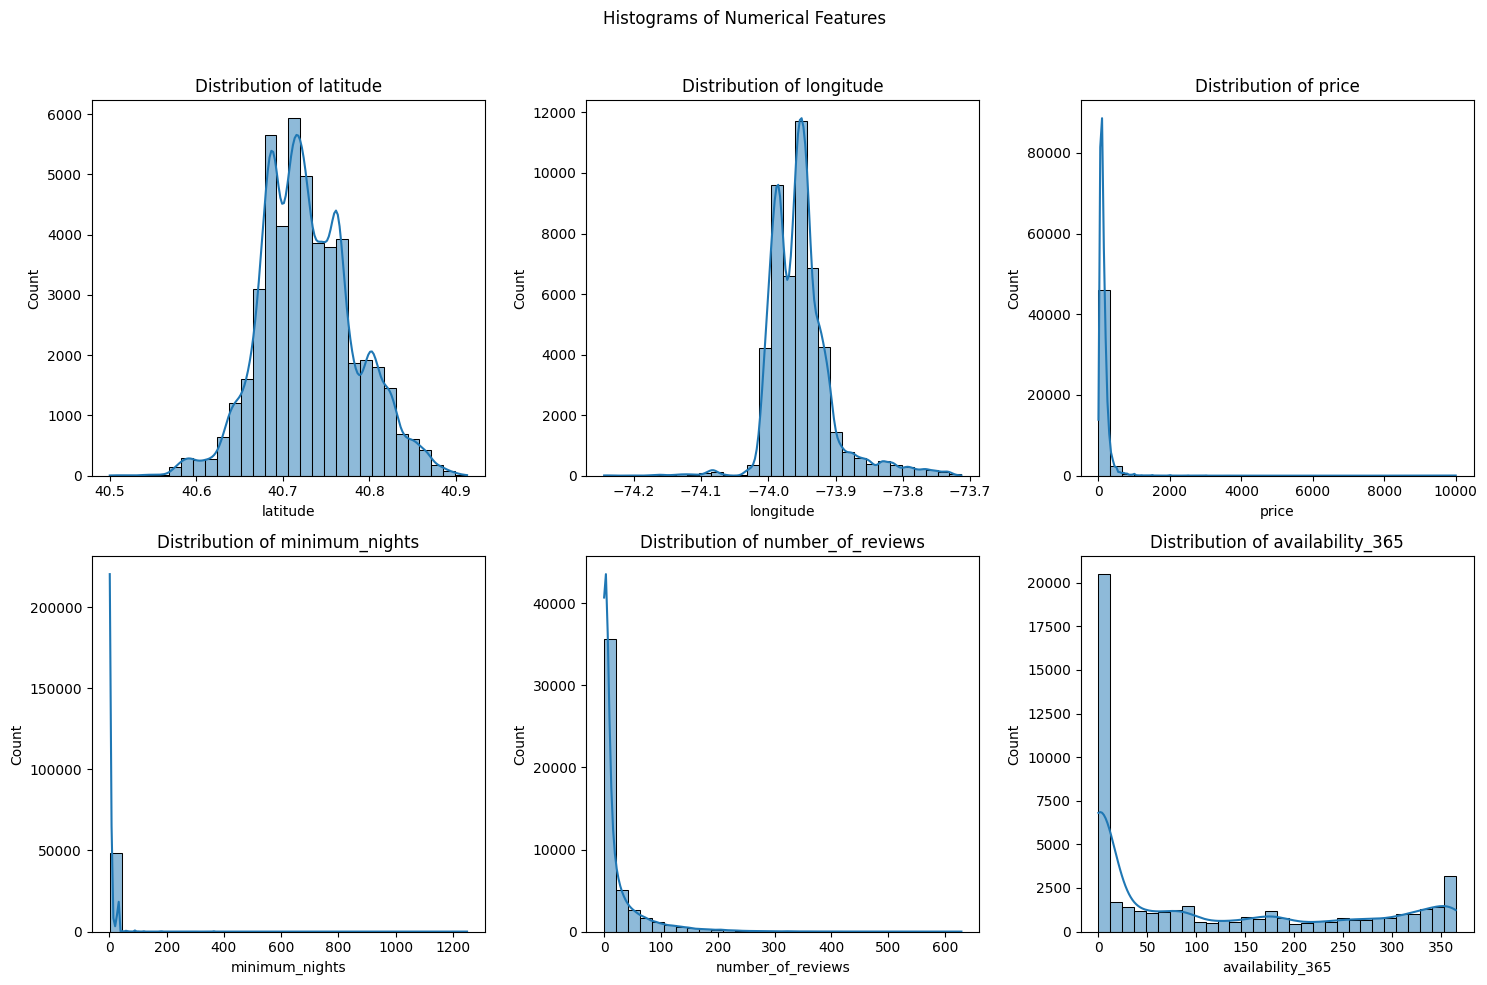

In [26]:
# Distribution of numerical features
print("\nDistribution of Numerical Features:")
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Histograms of Numerical Features")

numerical_cols = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'availability_365']
for i, col in enumerate(numerical_cols):
    sns.histplot(data[col], bins=30, kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f"Distribution of {col}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Boxplots for Outlier Detection:


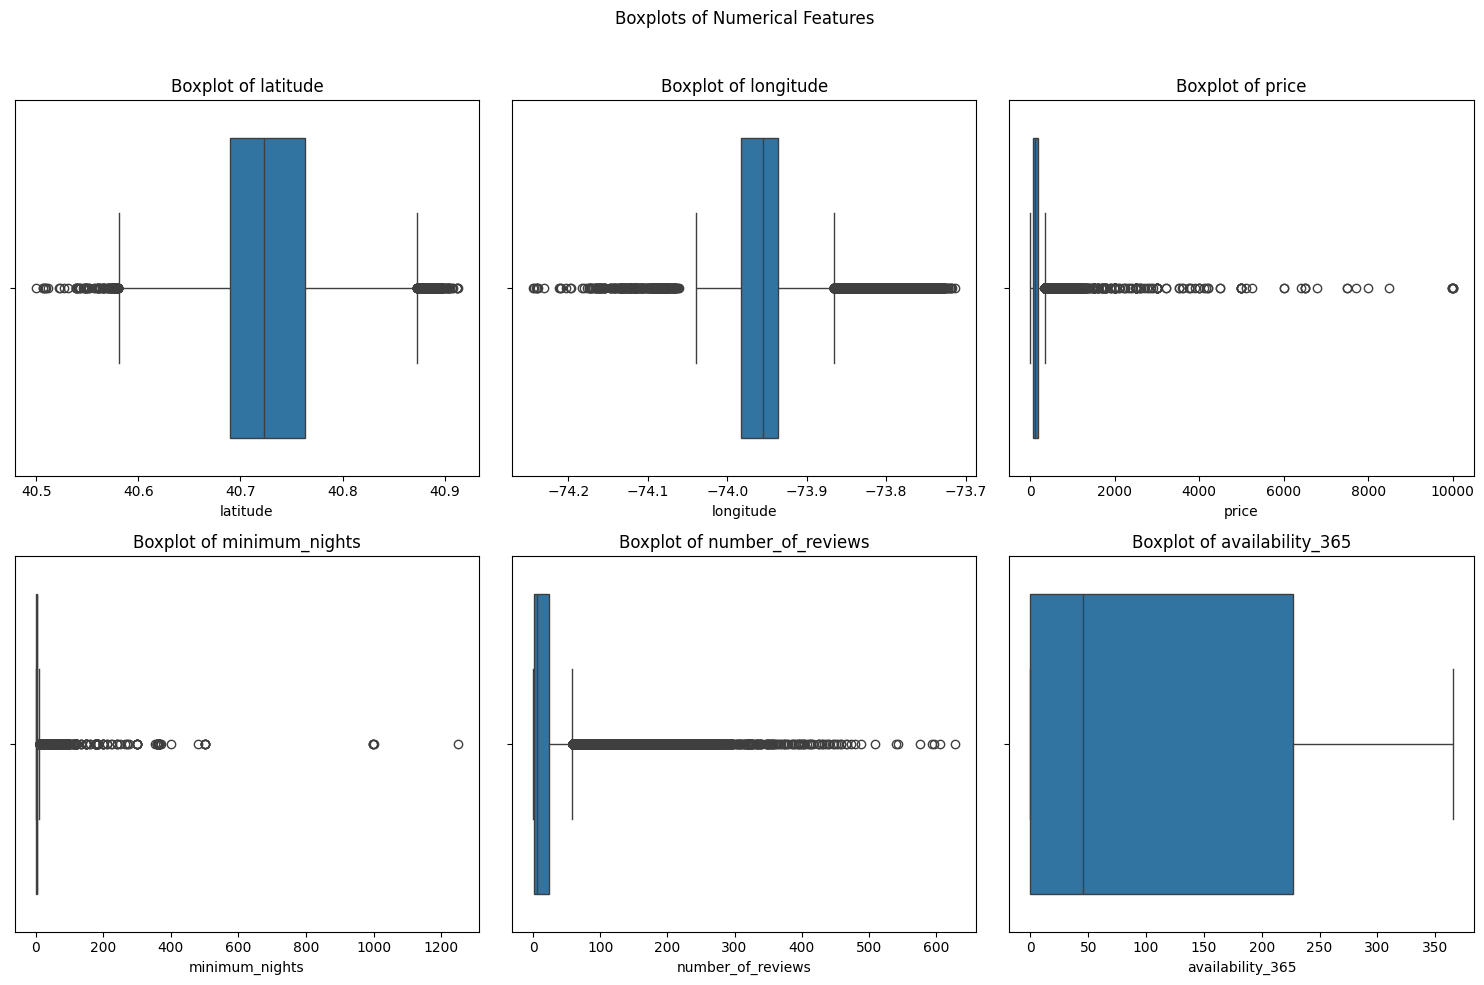

In [27]:
# Boxplots to detect outliers in numerical features
print("\nBoxplots for Outlier Detection:")
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Boxplots of Numerical Features")

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=data[col], ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f"Boxplot of {col}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Correlation Heatmap:


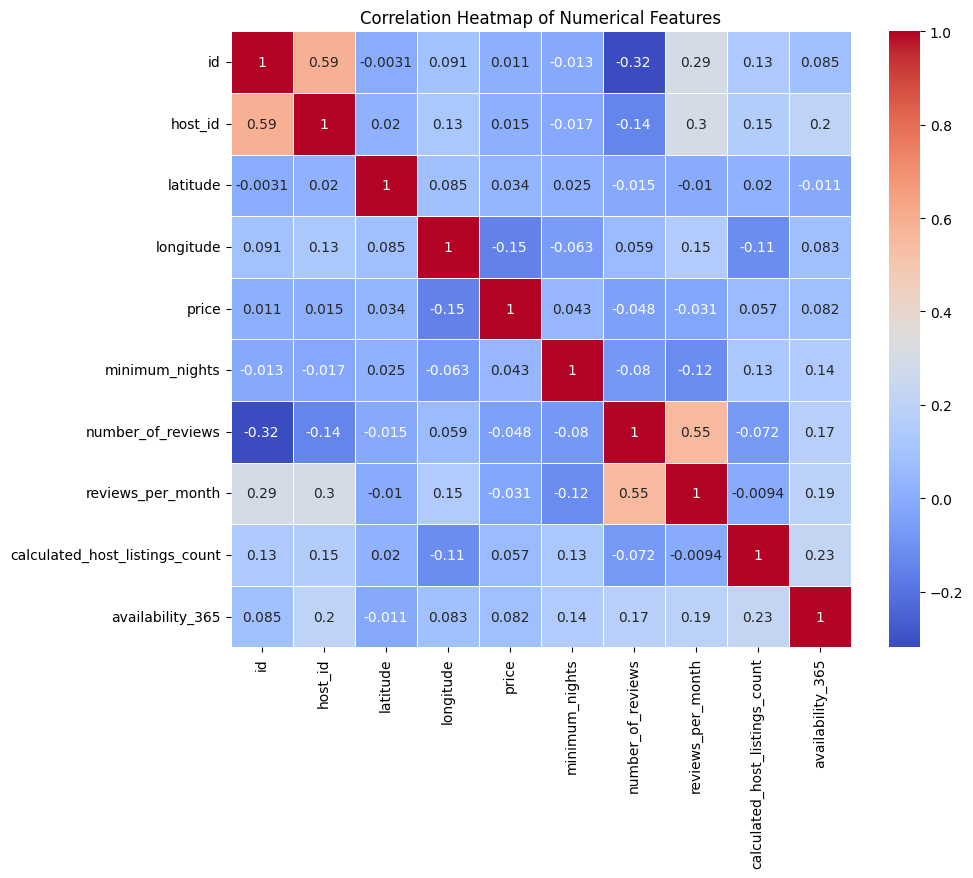

In [28]:
# Correlation heatmap for numerical variables
print("\nCorrelation Heatmap:")
plt.figure(figsize=(10, 8))
numerical_data = data.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Phase-3 Modify

## Handle Missing Values

In [29]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values[missing_values > 0])


Missing values in each column:
 name                    16
host_name               21
last_review          10052
reviews_per_month    10052
dtype: int64


In [30]:
# Fill missing values in 'reviews_per_month' with 0
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)
data['last_review'] = data['last_review'].fillna(0)
data['host_name'] = data['host_name'].fillna(0)
data['name'] = data['name'].fillna(0)

In [31]:
# Verify no missing values remain
print("Remaining missing values:\n", data.isnull().sum())

Remaining missing values:
 id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


## Encode Categorical Variables

In [32]:
# Import necessary library
from sklearn.preprocessing import OneHotEncoder

# Selecting categorical features
categorical_features = ['neighbourhood_group', 'room_type']

# Applying OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(data[categorical_features])

# Convert the result to a DataFrame for readability
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Concatenate the encoded DataFrame with the original dataset, dropping the original categorical columns
data = pd.concat([data.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
data = data.drop(categorical_features, axis=1)

print("Data after encoding:\n", data.head())


Data after encoding:
      id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood  latitude  longitude  price  minimum_nights  \
0         John    Kensington  40.64749  -73.97237    149               1   
1     Jennifer       Midtown  40.75362  -73.98377    225               1   
2    Elisabeth        Harlem  40.80902  -73.94190    150               3   
3  LisaRoxanne  Clinton Hill  40.68514  -73.95976     89               1   
4        Laura   East Harlem  40.79851  -73.94399     80              10   

   number_of_reviews  ... calculated_host_listings_count  availability_365  \
0                  9  

## Standardize/Normalize Numerical Variables

In [33]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Selecting numerical features
numerical_features = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical data
scaled_features = scaler.fit_transform(data[numerical_features])

# Convert the scaled data into a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=numerical_features)

# Drop the original numerical columns from `data` and add the standardized columns
data = data.drop(numerical_features, axis=1)
data = pd.concat([data.reset_index(drop=True), scaled_df.reset_index(drop=True)], axis=1)

print("Data after standardization:\n", data.head())


Data after standardization:
      id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood last_review  calculated_host_listings_count  \
0         John    Kensington  2018-10-19                               6   
1     Jennifer       Midtown  2019-05-21                               2   
2    Elisabeth        Harlem           0                               1   
3  LisaRoxanne  Clinton Hill  2019-07-05                               1   
4        Laura   East Harlem  2018-11-19                               1   

   neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  \
0                        0.0   

## Final Check on Data

In [34]:
# Display the final modified dataset
print("Final dataset shape:", data.shape)
print("First few rows of the modified dataset:\n", data.head())


Final dataset shape: (48895, 22)
First few rows of the modified dataset:
      id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood last_review  calculated_host_listings_count  \
0         John    Kensington  2018-10-19                               6   
1     Jennifer       Midtown  2019-05-21                               2   
2    Elisabeth        Harlem           0                               1   
3  LisaRoxanne  Clinton Hill  2019-07-05                               1   
4        Laura   East Harlem  2018-11-19                               1   

   neighbourhood_group_Bronx  neighbourhood_grou

# Phase-4 Model

## Preparing the Data for Modeling

In [35]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop(columns=['price'])  # All columns except 'price' are features
y = data['price']  # 'Price' is the target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (39116, 21)
Testing data shape: (9779, 21)


In [38]:
# Identify non-numerical columns
non_numeric_columns = X_train.select_dtypes(include=['object']).columns
print("Non-numerical columns:", non_numeric_columns)


Non-numerical columns: Index(['name', 'host_name', 'neighbourhood', 'last_review'], dtype='object')


In [52]:
# Drop irrelevant non-numerical columns
irrelevant_columns = ['name', 'host_name', 'neighbourhood', 'last_review']  # Add all non-useful columns here
X_train = X_train.drop(columns=irrelevant_columns, errors='ignore')
X_test = X_test.drop(columns=irrelevant_columns, errors='ignore')


In [53]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical columns
categorical_columns = ['neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room']  # Add all relevant categorical columns

# Apply OneHotEncoder to categorical columns
encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Encode train and test data
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

print("Shape after encoding (X_train):", X_train_encoded.shape)
print("Shape after encoding (X_test):", X_test_encoded.shape)


Shape after encoding (X_train): (39116, 25)
Shape after encoding (X_test): (9779, 25)


In [54]:
# Check available columns in X_train
print("Columns in X_train:", X_train.columns)


Columns in X_train: Index(['id', 'host_id', 'calculated_host_listings_count',
       'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room', 'latitude',
       'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'availability_365'],
      dtype='object')


## Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print("Mean Squared Error (MSE):", mse_lr)
print("Mean Absolute Error (MAE):", mae_lr)
print("R-squared:", r2_lr)


Linear Regression Results:
Mean Squared Error (MSE): 0.6746265764417209
Mean Absolute Error (MAE): 0.294803390405674
R-squared: 0.12049764452335332


## Decision Tree Regressor

In [56]:
from sklearn.tree import DecisionTreeRegressor

# Train a Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluation
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Results:")
print("Mean Squared Error (MSE):", mse_dt)
print("Mean Absolute Error (MAE):", mae_dt)
print("R-squared:", r2_dt)


Decision Tree Results:
Mean Squared Error (MSE): 1.7539685847114923
Mean Absolute Error (MAE): 0.34738581602766244
R-squared: -1.2866272328348751


## Random Forest Regressor

In [57]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Results:")
print("Mean Squared Error (MSE):", mse_rf)
print("Mean Absolute Error (MAE):", mae_rf)
print("R-squared:", r2_rf)


Random Forest Results:
Mean Squared Error (MSE): 0.6011350792089537
Mean Absolute Error (MAE): 0.25454169193085563
R-squared: 0.2163076039599393


## Gradient Boosting Regressor (XGBoost)

In [58]:
from xgboost import XGBRegressor

# Train an XGBoost model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Results:")
print("Mean Squared Error (MSE):", mse_xgb)
print("Mean Absolute Error (MAE):", mae_xgb)
print("R-squared:", r2_xgb)


XGBoost Results:
Mean Squared Error (MSE): 0.7448277671217316
Mean Absolute Error (MAE): 0.2734713443833667
R-squared: 0.028977217198966176


# Phase-5 Assess

## Comparing Model Performance

In [59]:
# Summarize results
results = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest", "XGBoost"],
    "MSE": [mse_lr, mse_dt, mse_rf, mse_xgb],
    "MAE": [mae_lr, mae_dt, mae_rf, mae_xgb],
    "R-squared": [r2_lr, r2_dt, r2_rf, r2_xgb]
})

print("Model Comparison:\n", results)


Model Comparison:
                Model       MSE       MAE  R-squared
0  Linear Regression  0.674627  0.294803   0.120498
1      Decision Tree  1.753969  0.347386  -1.286627
2      Random Forest  0.601135  0.254542   0.216308
3            XGBoost  0.744828  0.273471   0.028977


## Visualizing Actual vs. Predicted Values

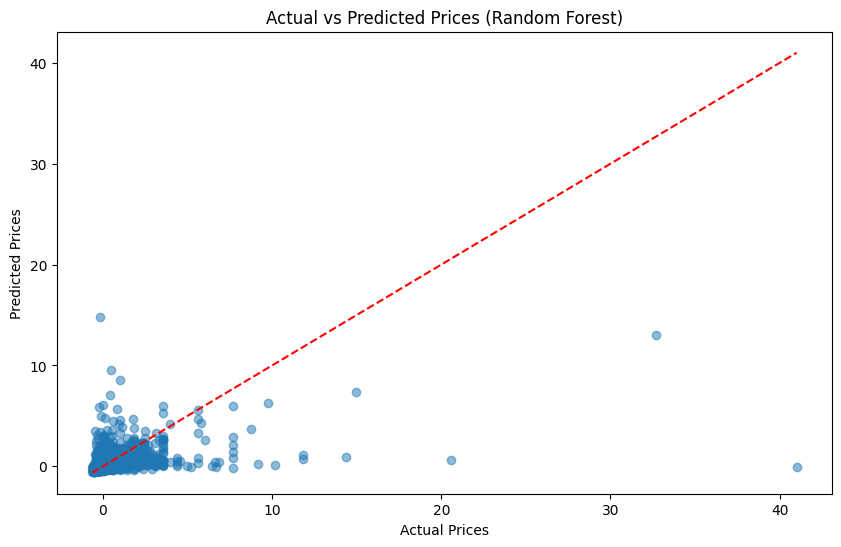

In [60]:
import matplotlib.pyplot as plt

# Plot actual vs predicted for Random Forest (best model in this example)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Actual vs Predicted Prices (Random Forest)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()


## Feature Importance (Random Forest)

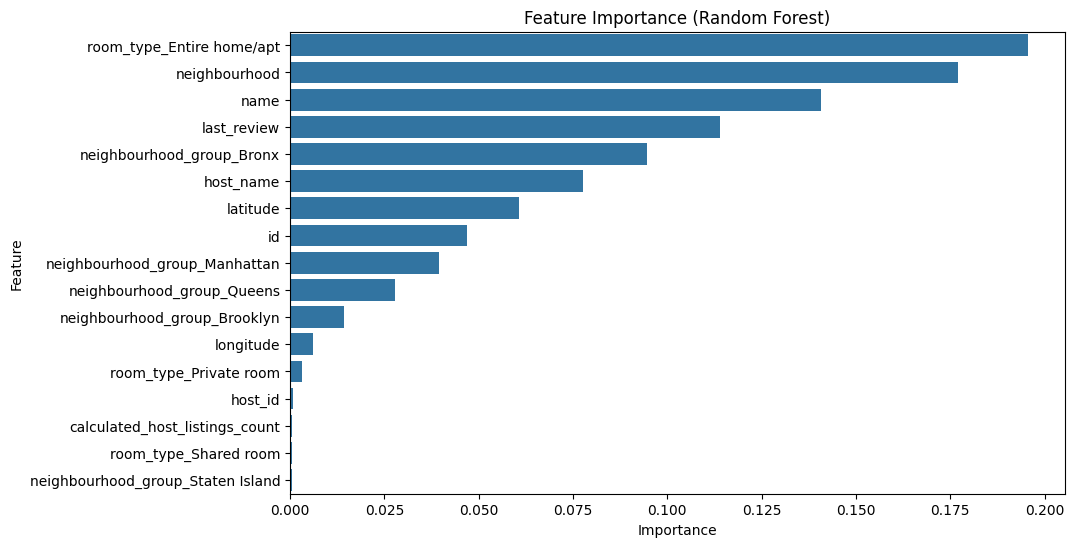

In [62]:
# Feature importance for Random Forest
importances = rf_model.feature_importances_
# Get the features actually used by the model
features = X.columns[rf_model.feature_importances_.argsort()[::-1]] #This line is changed

importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance (Random Forest)")
plt.show()


## Hyperparameter Tuning (XGBoost)

In [63]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# GridSearchCV for XGBoost
grid_search = GridSearchCV(estimator=XGBRegressor(random_state=42), param_grid=param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best R-squared Score:", grid_search.best_score_)


Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Best R-squared Score: 0.15815456229330946
